In [1]:
%pwd

'C:\\Users\\Carlo\\EE258_Project'

import os
for filenames in os.listdir('dataset/'):
        print(os.path.join("dataset/", filenames))

In [2]:
import numpy as np 
import pandas as pd

import os

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

# Dataset Path

In [3]:
train_dir = os.path.join("dataset/Rock-Paper-Scissors/train/")
print("Train datapath contains: ", os.listdir(train_dir))


val_dir = os.path.join("dataset/Rock-Paper-Scissors/validation/")
print("Validation datapath contains: ", os.listdir(val_dir))

test_dir = os.path.join("dataset/Rock-Paper-Scissors/test/")
print("Test datapath contains: ", os.listdir(test_dir))

custom_test_dir = os.path.join("dataset/Rock-Paper-Scissors/custom_test/")
print("Test datapath contains: ", os.listdir(custom_test_dir))


Train datapath contains:  ['paper', 'rock', 'scissors']
Validation datapath contains:  ['paper', 'rock', 'scissors']
Test datapath contains:  ['paper-hires1.png', 'paper-hires2.png', 'paper1.png', 'paper2.png', 'paper3.png', 'paper4.png', 'paper5.png', 'paper6.png', 'paper7.png', 'paper8.png', 'paper9.png', 'rock-hires1.png', 'rock-hires2.png', 'rock1.png', 'rock2.png', 'rock3.png', 'rock4.png', 'rock5.png', 'rock6.png', 'rock7.png', 'rock8.png', 'rock9.png', 'scissors-hires1.png', 'scissors-hires2.png', 'scissors1.png', 'scissors2.png', 'scissors3.png', 'scissors4.png', 'scissors5.png', 'scissors6.png', 'scissors7.png', 'scissors8.png', 'scissors9.png']
Test datapath contains:  ['paper (1).JPG', 'paper (2).JPG', 'paper (3).JPG', 'paper (4).JPG', 'paper (5).JPG', 'paper (6).JPG', 'rock (1).JPG', 'rock (2).JPG', 'rock (3).JPG', 'rock (4).JPG', 'rock (5).JPG', 'rock (6).JPG', 'scissors (1).JPG', 'scissors (2).JPG', 'scissors (3).JPG', 'scissors (4).JPG', 'scissors (5).JPG', 'scissors (6)

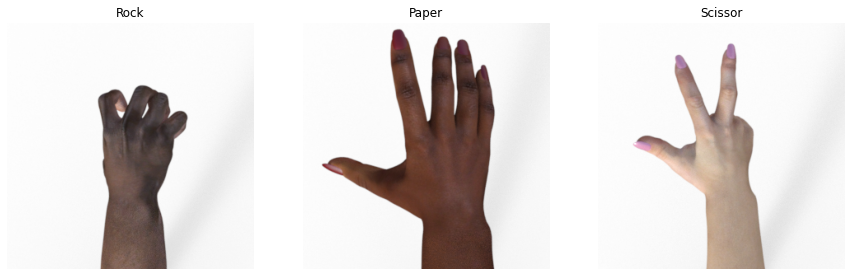

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + "rock/" + sample_rock)
ax[0].imshow(image)
ax[0].set_title("Rock")
ax[0].axis("Off")

sample_paper = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[1].imshow(image)
ax[1].set_title("Paper")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

# Training Data Sample

# Modeling the NN

In [5]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Callback

In [8]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached >95% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

Training Generator

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


Validation Generator

In [11]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


In [40]:
train_gen

In [12]:
import time
start_time = time.time()
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 2)
end_time = time.time()

Epoch 1/10
126/126 - 30s - loss: 1.0136 - accuracy: 0.4599 - val_loss: 0.4933 - val_accuracy: 0.7581 - 30s/epoch - 242ms/step
Epoch 2/10
126/126 - 29s - loss: 0.5541 - accuracy: 0.7702 - val_loss: 0.1956 - val_accuracy: 0.9167 - 29s/epoch - 231ms/step
Epoch 3/10
126/126 - 29s - loss: 0.2725 - accuracy: 0.9040 - val_loss: 0.0596 - val_accuracy: 0.9919 - 29s/epoch - 231ms/step
Epoch 4/10
126/126 - 29s - loss: 0.1709 - accuracy: 0.9369 - val_loss: 0.0340 - val_accuracy: 1.0000 - 29s/epoch - 233ms/step
Epoch 5/10
126/126 - 29s - loss: 0.1243 - accuracy: 0.9552 - val_loss: 0.1398 - val_accuracy: 0.9355 - 29s/epoch - 230ms/step
Epoch 6/10
126/126 - 29s - loss: 0.1041 - accuracy: 0.9671 - val_loss: 0.1253 - val_accuracy: 0.9435 - 29s/epoch - 231ms/step
Epoch 7/10
126/126 - 29s - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.0417 - val_accuracy: 0.9892 - 29s/epoch - 231ms/step
Epoch 8/10
126/126 - 29s - loss: 0.0980 - accuracy: 0.9667 - val_loss: 0.0539 - val_accuracy: 0.9731 - 29s/epoch - 231

In [13]:
print("Training time: ",end_time-start_time)

Training time:  295.6204569339752


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing with similar training data

In [14]:
test_img = os.listdir(os.path.join(test_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df['True Label'] = test_df['Image']
for ind in test_df.index: 
    if('paper' in test_df['Image'][ind]):
        test_df['True Label'][ind] = 'paper'
    if('rock' in test_df['Image'][ind]):
        test_df['True Label'][ind] = 'rock'   
    if('scissors' in test_df['Image'][ind]):
        test_df['True Label'][ind] = 'scissors'    


test_df

,Image,True Label
0,paper-hires1.png,paper
1,paper-hires2.png,paper
2,paper1.png,paper
3,paper2.png,paper
4,paper3.png,paper
5,paper4.png,paper
6,paper5.png,paper
7,paper6.png,paper
8,paper7.png,paper
9,paper8.png,paper


In [15]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [16]:
predict = model.predict(test_generator, steps = int(np.ceil(33/20)))

In [17]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [18]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

test_df



,Image,True Label,Label
0,paper-hires1.png,paper,paper
1,paper-hires2.png,paper,paper
2,paper1.png,paper,paper
3,paper2.png,paper,paper
4,paper3.png,paper,scissors
5,paper4.png,paper,paper
6,paper5.png,paper,paper
7,paper6.png,paper,paper
8,paper7.png,paper,paper
9,paper8.png,paper,paper


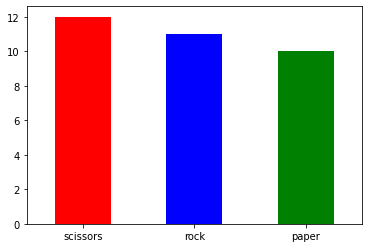

In [19]:
test_df.Label.value_counts()
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

# Test Dataset with similar training data

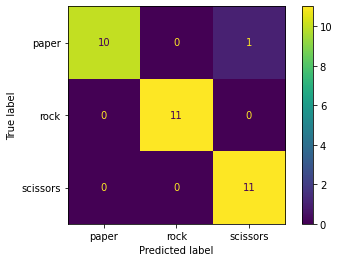

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_test = confusion_matrix(test_df['True Label'].to_numpy(), test_df['Label'].to_numpy())

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['paper','rock','scissors'])
disp_test.plot()

In [22]:
from sklearn.metrics import classification_report
y_true = test_df['True Label'].to_numpy()
y_pred = test_df['Label'].to_numpy()
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

       paper      1.000     0.909     0.952        11
        rock      1.000     1.000     1.000        11
    scissors      0.917     1.000     0.957        11

    accuracy                          0.970        33
   macro avg      0.972     0.970     0.970        33
weighted avg      0.972     0.970     0.970        33



In [23]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
print("Accuracy of the model on custom test data is {:.3f}".format((sum(lis)/len(lis))*100))        

Accuracy of the model on custom test data is 96.970


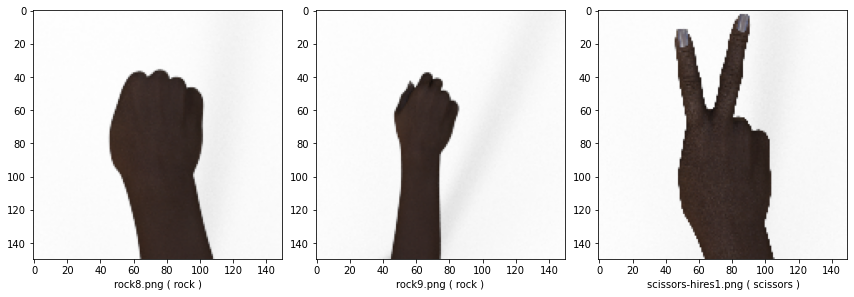

In [72]:
v = random.randint(0, 25)

sample_test = test_df.iloc[v:(v+3)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(test_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

# Test Data (A) Sample

# Custom Test dataset

In [25]:
custom_img = os.listdir(os.path.join(custom_test_dir))

custom_test_df = pd.DataFrame({'Image': custom_img})

custom_test_df['True Label'] = custom_test_df['Image']
for ind in custom_test_df.index: 
    if('paper' in custom_test_df['Image'][ind]):
        custom_test_df['True Label'][ind] = 'paper'
    if('rock' in custom_test_df['Image'][ind]):
        custom_test_df['True Label'][ind] = 'rock'   
    if('scissors' in custom_test_df['Image'][ind]):
        custom_test_df['True Label'][ind] = 'scissors'  
custom_test_df

,Image,True Label
0,paper (1).JPG,paper
1,paper (2).JPG,paper
2,paper (3).JPG,paper
3,paper (4).JPG,paper
4,paper (5).JPG,paper
5,paper (6).JPG,paper
6,rock (1).JPG,rock
7,rock (2).JPG,rock
8,rock (3).JPG,rock
9,rock (4).JPG,rock


In [26]:
custom_test_dir

'dataset/Rock-Paper-Scissors/custom_test/'

In [27]:
custom_test_gen = ImageDataGenerator(rescale=1./255)

custom_test_generator = test_gen.flow_from_dataframe(
    custom_test_df, 
    custom_test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False,
    interpolation='bilinear'
)

Found 19 validated image filenames.


In [28]:
predict = model.predict(custom_test_generator, steps = 1)

In [30]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [31]:
custom_test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

custom_test_df['Label'] = custom_test_df['Label'].replace(label_map)

In [32]:
custom_test_df

,Image,True Label,Label
0,paper (1).JPG,paper,paper
1,paper (2).JPG,paper,paper
2,paper (3).JPG,paper,paper
3,paper (4).JPG,paper,paper
4,paper (5).JPG,paper,paper
5,paper (6).JPG,paper,paper
6,rock (1).JPG,rock,paper
7,rock (2).JPG,rock,paper
8,rock (3).JPG,rock,paper
9,rock (4).JPG,rock,rock


# Test Dataset using Custom New Data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(custom_test_df['True Label'], custom_test_df['Label'])

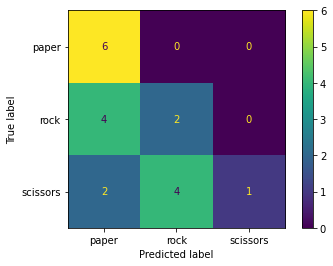

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['paper','rock','scissors'])
disp.plot()

In [39]:
y_true = custom_test_df['True Label']
y_pred = custom_test_df['Label']
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

       paper     0.5000    1.0000    0.6667         6
        rock     0.3333    0.3333    0.3333         6
    scissors     1.0000    0.1429    0.2500         7

    accuracy                         0.4737        19
   macro avg     0.6111    0.4921    0.4167        19
weighted avg     0.6316    0.4737    0.4079        19



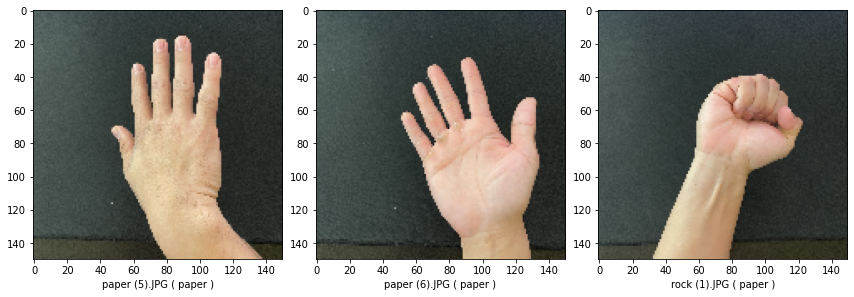

In [82]:
v = random.randint(0, 25)
#

sample_test = custom_test_df.iloc[v:(v+3)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(custom_test_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

# Test Data (B) Sample

Accuracy

In [37]:
lis = []
for ind in custom_test_df.index: 
    if(custom_test_df['Label'][ind] in custom_test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)
        
print("Accuracy of the model on custom test data is {:.3f}".format((sum(lis)/len(lis))*100))        

Accuracy of the model on custom test data is 47.368
